In [1]:
import cv2
import numpy as np

img = cv2.imread('paper.jpeg', 0)
kernel = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]])

# Apply convolution
filtered = cv2.filter2D(img, -1, kernel)

cv2.imshow('Filtered', filtered)
cv2.waitKey(0)
cv2.destroyAllWindows()

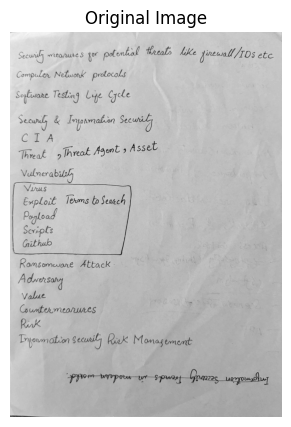

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image in grayscale
image = cv2.imread('paper.jpeg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(5, 5))
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()


In [3]:
# Define multiple filters
filters = {
    'Identity': np.array([[0, 0, 0], [0, 1, 0], [0, 0, 0]]),
    'Edge Detection (Sobel X)': np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]),
    'Edge Detection (Sobel Y)': np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]]),
    'Sharpen': np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]),
    'Box Blur': np.ones((3, 3), dtype=np.float32) / 9,
    'Gaussian Blur': cv2.getGaussianKernel(3, 0) @ cv2.getGaussianKernel(3, 0).T
}


In [4]:
# Apply each filter using cv2.filter2D
results = {}

for name, kernel in filters.items():
    filtered = cv2.filter2D(image, -1, kernel)
    results[name] = filtered


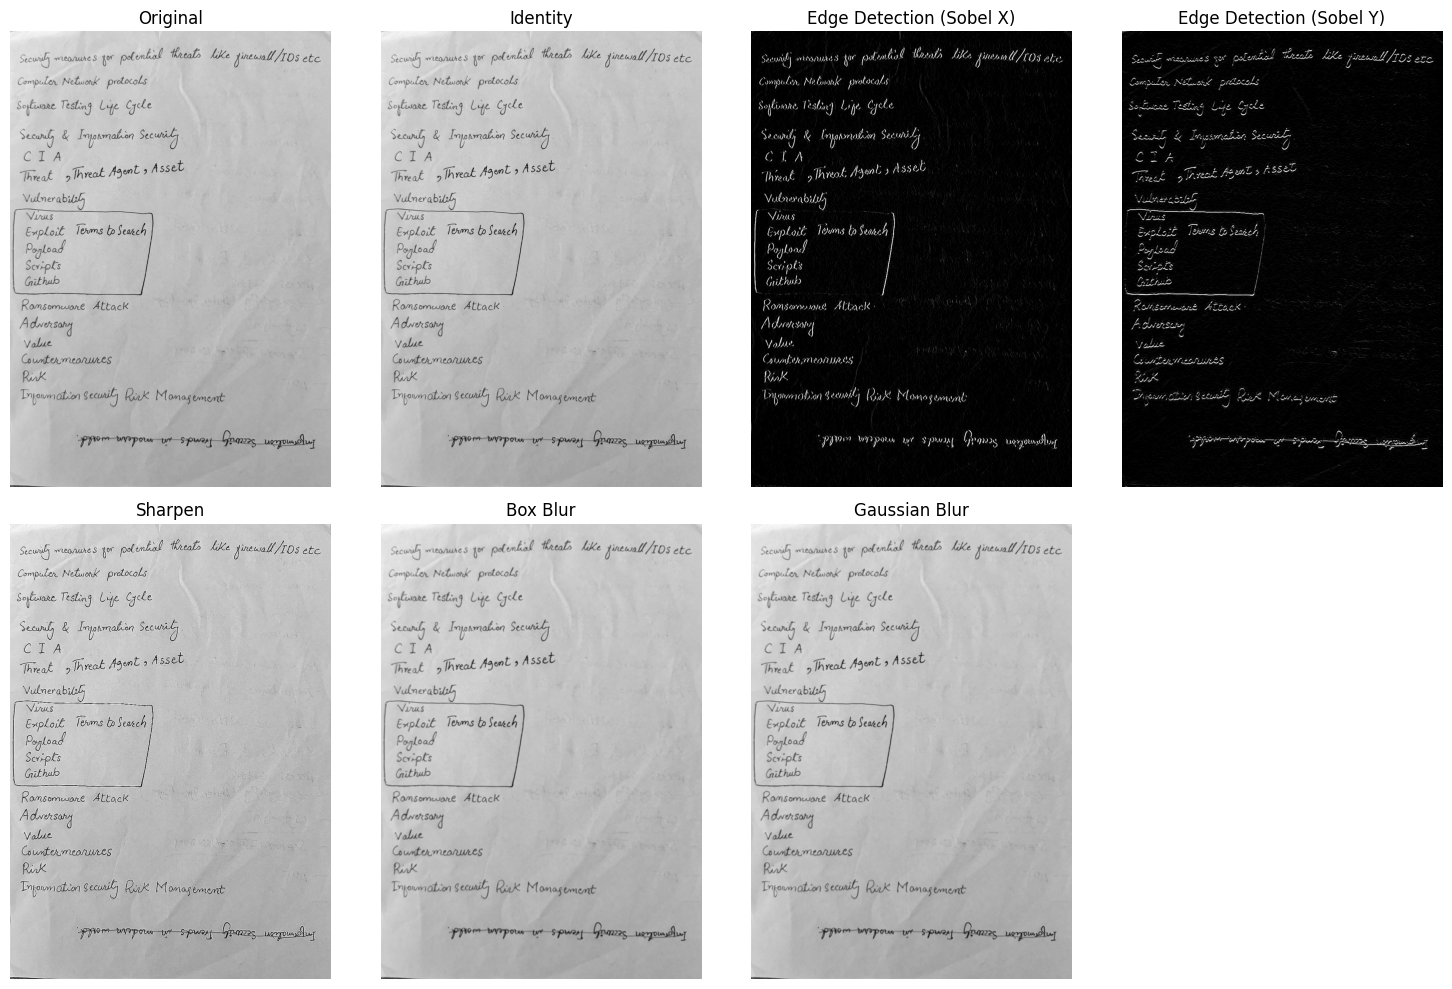

In [5]:
# Show original + all filtered images
plt.figure(figsize=(15, 10))

# Show original
plt.subplot(2, 4, 1)
plt.imshow(image, cmap='gray')
plt.title("Original")
plt.axis('off')

# Show filtered results
for i, (name, result) in enumerate(results.items(), 2):
    plt.subplot(2, 4, i)
    plt.imshow(result, cmap='gray')
    plt.title(name)
    plt.axis('off')

plt.tight_layout()
plt.show()


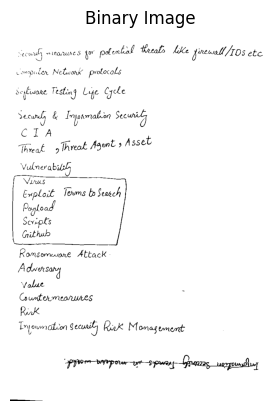

In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image and convert to grayscale
image = cv2.imread('paper.jpeg', 0)  # 0 = grayscale

# Convert to binary
_, binary = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

plt.imshow(binary, cmap='gray')
plt.title("Binary Image")
plt.axis('off')
plt.show()


In [7]:
kernel = np.ones((5, 5), np.uint8)  # 5x5 square kernel


In [8]:
erosion = cv2.erode(binary, kernel, iterations=1)
dilation = cv2.dilate(binary, kernel, iterations=1)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel)
gradient = cv2.morphologyEx(binary, cv2.MORPH_GRADIENT, kernel)


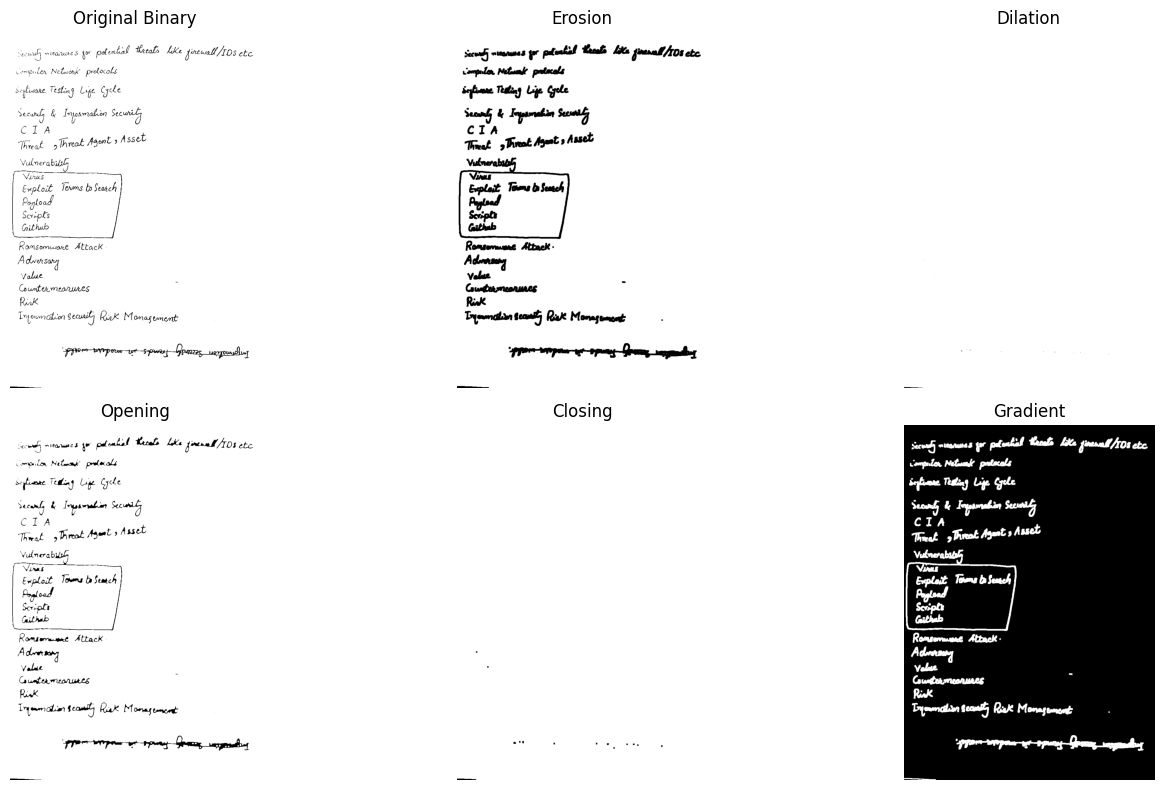

In [9]:
images = [binary, erosion, dilation, opening, closing, gradient]
titles = ['Original Binary', 'Erosion', 'Dilation', 'Opening', 'Closing', 'Gradient']

plt.figure(figsize=(15, 8))

for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()
